In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
train_path = '../Retraining/resources/train'
valid_path = '../Retraining/resources/valid'
test_path = '../Retraining/resources/test'

In [3]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 299 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=299 // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=82 // batch_size)

Epoch 1/50
18/18 [==============================] - 3s 188ms/step - loss: 7.5793 - acc: 0.4836 - val_loss: 6.2458 - val_acc: 0.6125
Epoch 2/50
18/18 [==============================] - 3s 143ms/step - loss: 8.0509 - acc: 0.5005 - val_loss: 6.8380 - val_acc: 0.5758
Epoch 3/50
18/18 [==============================] - 3s 144ms/step - loss: 7.6185 - acc: 0.5238 - val_loss: 5.7789 - val_acc: 0.6364
Epoch 4/50
18/18 [==============================] - 3s 144ms/step - loss: 1.4265 - acc: 0.6554 - val_loss: 0.3324 - val_acc: 0.7424
Epoch 5/50
18/18 [==============================] - 3s 154ms/step - loss: 0.6458 - acc: 0.7222 - val_loss: 0.3766 - val_acc: 0.8030
Epoch 6/50
18/18 [==============================] - 3s 140ms/step - loss: 0.5235 - acc: 0.7969 - val_loss: 0.4302 - val_acc: 0.8030
Epoch 7/50
18/18 [==============================] - 3s 140ms/step - loss: 0.5691 - acc: 0.8057 - val_loss: 0.9196 - val_acc: 0.6875
Epoch 8/50
18/18 [==============================] - 3s 148ms/step - loss: 0.

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255
)

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 35 images belonging to 3 classes.


In [7]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 2ms/step


[0.6935157179832458, 0.9375]

In [8]:
np.round(ynew, decimals = 2)

NameError: name 'ynew' is not defined

In [ ]:
labels

In [ ]:
gul_path = '../Retraining/tfpoet/tf_files/test/gulerod.jpg'
img = image.load_img(gul_path, target_size=(224, 224))
img = image.img_to_array(img)
img = img
img = np.expand_dims(img, axis=0)
out = model.predict(img)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


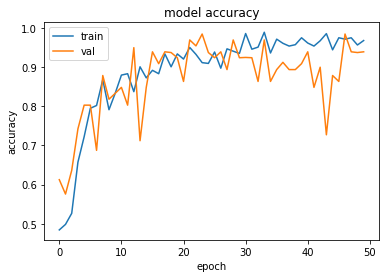

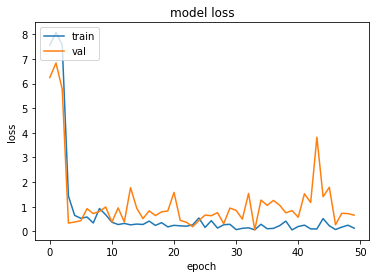

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

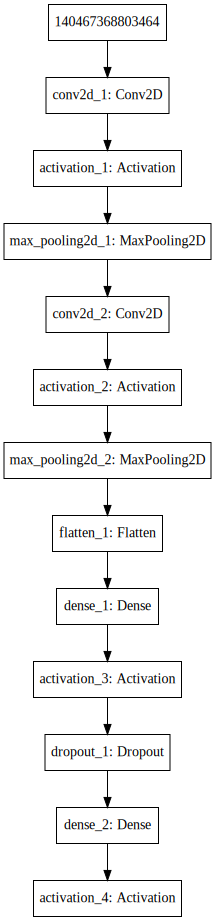

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))